In [3]:
# Attempt May 11 2020 no. 2 on solving schro. eq. for l = 0 orbitals 
# This is an eigenvalue BVP (boundary value problem) 
# Boundary conditions are psi(0) = 0 and psi(inf) = 0
# Incorporating the shooting method by using the initial values
# Following https://kitchingroup.cheme.cmu.edu/blog/2013/02/15/Plane-Poiseuille-flow-BVP-solve-by-shooting-method/

In [4]:
# First define the ODE from Eq. 19.8 from Feynman's Lecture - The hydrogen atom
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
\frac{1}{r}\frac{d^2}{dr^2}(r\psi) = \frac{2m}{\hbar^2}(E + \frac{e^2}{r})\psi \\
\psi(0) = 0 ~~,~~ \psi(\infty) = 0
\end{eqnarray}""")

<IPython.core.display.Latex object>

In [5]:
# Next rewrite the second order equation as a first order system and implement its right-hand side evaluation:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
y_1' = \frac{d(r\psi)}{dr}\\
y_2' = y_1'' = \frac{d^2(r\psi)}{dr^2} = \frac{r2m}{\hbar^2}(E + \frac{e^2}{r})\psi \\

\end{eqnarray}""")
# Here, y_1 and y_2 are intermediate variables relating the derivatives of psi
# The last equality below is directly from rearranging the defined ODE

<IPython.core.display.Latex object>

In [11]:
# Now turn that into code
# Write function that returns y_1' and y_2' wrt (r*psi)
# IMPORTANT: we will solve for r*psi as the amplitude, rather than psi
# https://kitchingroup.cheme.cmu.edu/pycse/pycse.html#orgcdb725d and fsolve documentation
import numpy as np
def odefun(r, rpsi, p, n):
    # first unpack the elements in rpsi
    y_1, y_2 = rpsi
    # p is a one element vector that passes the variable 
    E = p*n
    # define the derivative as above
    dy_1dr = y_2
    dy_2dr = - 2*r*(E + 1/r)*rpsi[0]/r
    # return the expression of y_1' and y_2' wrt r*psi
    return [dy_1dr, dy_2dr]
    # let m = hbar = e = 1

In [12]:
# define this boundary condition (also an initial value)
y_1_0 = 0 # known
rspan = np.linspace(0.2, 20)

# determine the trial wavefunctions by solving the initial value problem
# These wavefunctions will be searched through later for those 
#    that satisfy the boundary conditions 
import numpy as np
from scipy.integrate import odeint
import scipy.integrate 
p = 1
# y_2_0 is the initial derivative
# the objective func solves odefun as an initial value problem
#     with a given initial position and derivative
# This gives the wavefunctions, but which don't satisfy the boundary conditions yet
def objective(y_2_0): 
    rspan = np.linspace(0.2, 20)
    # sol takes the results r, rpsi and drpsi/dr solved from the ODE
    sol = sp.integrate.solve_ivp(odefun, [0.1, 50, 100], y0=[y_1_0, y_2_0], t_eval=rspan, args=(p, 1))
    # y_1 takes the first column of rpsi: rpsi
    y_1 = sol.y[0]
    # return the last element of y_1: last element of rpsi 
    return y_1[-1]

E = -2.5


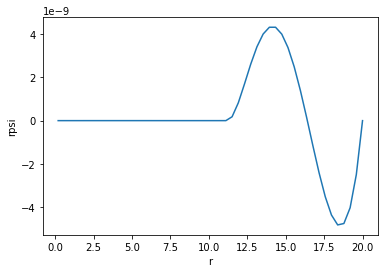

E = -2.0


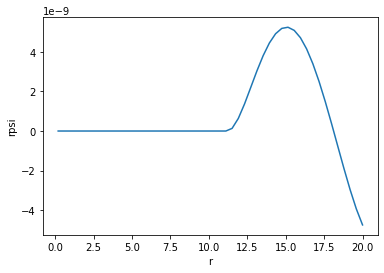

E = -1.5


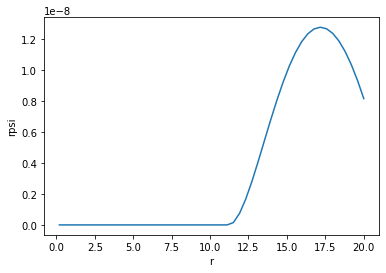

E = -1.0


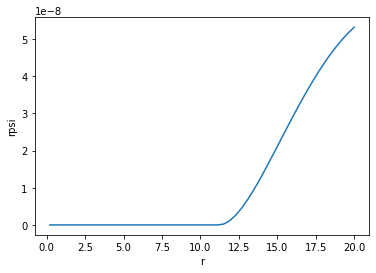

E = -0.5


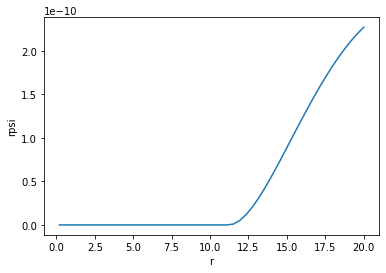

E = 0.0


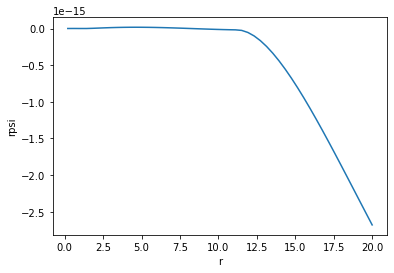

E = 0.5


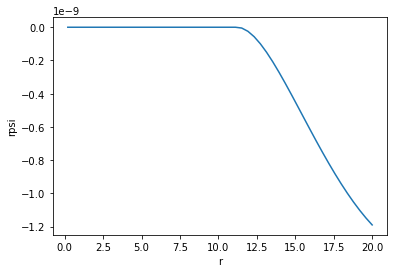

E = 1.0


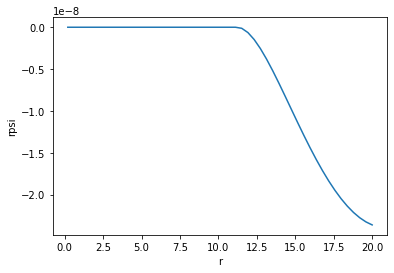

E = 1.5


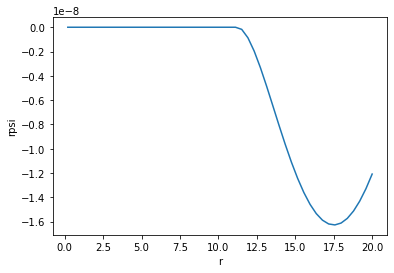

E = 2.0


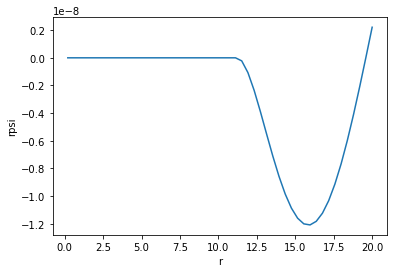

In [15]:
# Use fsolve to find the root 
# Returns the roots of the (non-linear) equations defined by func(x) = 0 given a starting estimate.
# Here, the "func" gives the last element of psi which should be zero by the boundary condition 
# y_2_0 gives the initial derivative solution that satisfies the boundary conditions

import scipy.integrate 
import scipy as sp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

rspan = np.linspace(0.2, 20)
y_2_0 = fsolve(objective, 1.0)

# now solve with optimal y_2_0
for i in range(10):
    p = i/2 - 2.5
    rpsi = sp.integrate.solve_ivp(odefun, [0.1, 50, 100], y0=[y_1_0, y_2_0], t_eval=rspan, args=(p, 1))
    plt.plot(rspan, rpsi.y[0]/rspan)
    plt.xlabel("r")
    plt.ylabel("rpsi")
    print("E =", p)
    plt.show()